<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h6> Harry - I added the below code from stockoverflow </h6>

Click the link here to [thread](https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail/53311747#53311747)

In [2]:
# Utility to help print out head and tail of dataframe
def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset [NB Need to provide link to csv file]


In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [4]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [5]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [6]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [7]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

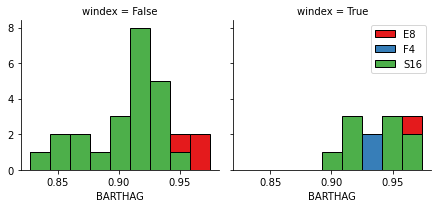

In [9]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

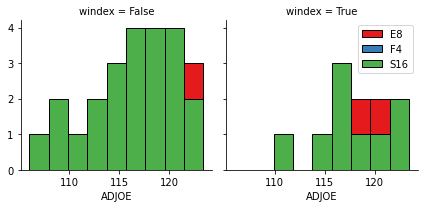

In [10]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


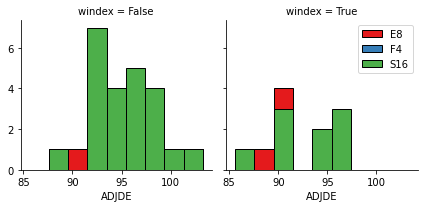

In [11]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [12]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [13]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Lets defind feature sets, X:


In [14]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


#### Harry - Saving Column Names of the Feature Set

In [15]:
featureNames = X.columns
featureNames

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'windex'],
      dtype='object')

What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [16]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation


Split the data into Training and Validation data.


In [18]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


#### Harry - Saving the label values of the Test (aka Validation) Set

In [19]:
ytrain_labels = np.unique(y_train) #Harry - new
ytrain_labels

array(['E8', 'F4', 'S16'], dtype=object)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k = 5
knnmodel = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train) #Train on training set
yhat_knn = knnmodel.predict(X_val) #Predit on Test Set

#Evaulation Metric on KNN Model
print("Train set Accuracy: %.5f" % accuracy_score(y_train, knnmodel.predict(X_train))) #training set
print("Test set Accuracy: %.5f" %  accuracy_score(y_val, yhat_knn)) #test set

Train set Accuracy: 0.63636
Test set Accuracy: 0.66667


<h6> Harry - I am courious to see the the different eval metrics on the KNN Model </h6>

In [21]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
eval_knn = {'model_name'  : 'KNN Model',
            'accuracy'    : accuracy_score(y_val, yhat_knn),
            'accuracy_f1' : f1_score(y_val, yhat_knn, average='micro'),
            'accuracy_jc' : jaccard_score(y_val, yhat_knn,average='micro')
           }
df_eval_knn = pd.DataFrame(data=eval_knn, index=[0])
df_eval_knn

,model_name,accuracy,accuracy_f1,accuracy_jc
0,KNN Model,0.666667,0.666667,0.5


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k the on the validation data:


In [22]:
Ks = 15
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(1,(Ks+1)):
    
    #Train Model and Predict  
    knnmodel = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=knnmodel.predict(X_val)
    mean_acc[n-1] = accuracy_score(y_val, yhat_knn)   #accuary score
    std_acc[n-1]=np.std(yhat_knn==y_val)/np.sqrt(yhat_knn.shape[0]) #standard deviation

df_knn_acc = pd.DataFrame(list(zip(mean_acc,std_acc)), columns=['mean_acc','std_acc'])
df_knn_acc.insert(0,'K_neighbors',df_knn_acc.index + 1) # Addiing a column for K-neighbors
display_n(df_knn_acc,5) #display top 5 and bottom 5 rows

,K_neighbors,mean_acc,std_acc
0,1,0.333333,0.136083
1,2,0.333333,0.136083
2,3,0.500000,0.144338
3,4,0.583333,0.142319
4,5,0.666667,0.136083
...,...,...,...
10,11,0.583333,0.142319
11,12,0.500000,0.144338
12,13,0.583333,0.142319
13,14,0.583333,0.142319


<h6>Harry - Extra - Plot the graph </h6>

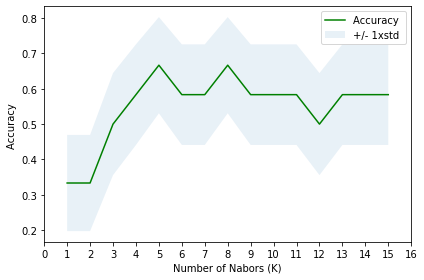

In [23]:
# Plot the graph
plt.plot(range(1,(Ks+1)),mean_acc,'g')

x_ticks = np.arange(0, (Ks+2), 1) #Used to help define the xtick mark range
plt.xticks(x_ticks) # to help control the range for tick marks 
plt.xlim(0,(Ks+1)) # x-axis range

plt.fill_between(range(1,(Ks+1)),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10) #plot plus or minus std
plt.legend(('Accuracy ', '+/- 1xstd'))

plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')

plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6666666666666666 with k= 5


<b> Harry - Used for the a later part of the lab </b>

In [25]:
knnmodel = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [26]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 

<b> Answer is below: This will be used for a later part of lab </b> 

In [27]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
dtmodel.fit(X_train,y_train) #Train the model
yhat_dt=dtmodel.predict(X_val) #Predict out-of-sample values
TreeAccuracy=accuracy_score(y_val,yhat_dt) #Evaluate the out-sample values with actual values
TreeAccuracy #Display accuracy

0.6666666666666666

<b> The work to reach conclusion for the above </b>

In [28]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

Ks = 15 # Let's try 

# initilize arrays to store accuarcy
mean_acc_dt_test = np.zeros((Ks)) #for test set
f1_score_dt = np.zeros((Ks))      #for test set
mean_acc_dt_train = np.zeros((Ks))#for TRAIN set

#keep track the best parameter
c_best_parameter = 0
c_best_accuracy = 0

#Loop from 1 to Ks for different MaxDepth
for n in range(1,(Ks+1)):
    
    #Train Model and Predict  
    dtmodel2  = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=7) #use the same random state value to see
    dtmodel2.fit(X_train,y_train)
    
    #Predit for test set
    yhat_dt=dtmodel2.predict(X_val)
    
    #evaluation metrics
    mean_acc_dt_test[n-1] = accuracy_score(y_val, yhat_dt)   #accuary score for test set
    f1_score_dt[n-1] = f1_score(y_val, yhat_dt, average='weighted') #F1-score for test set (we're going to do weighted)
    mean_acc_dt_train[n-1] = accuracy_score(y_train, dtmodel2.predict(X_train)) #accuary score for train set
    
    if mean_acc_dt_test[n-1] > c_best_accuracy:
        c_best_accuracy = mean_acc_dt_test[n-1]
        c_best_parameter = n
        c_best_model = dtmodel2

print( "The best accuracy was with %.5f with k=%d" % (mean_acc_dt_test.max(), (mean_acc_dt_test.argmax()+1)))
print("Best max_depth: %d ; Accuracy is %.5f" % (c_best_parameter,c_best_accuracy)) #used to double check

The best accuracy was with 0.66667 with k=1
Best max_depth: 1 ; Accuracy is 0.66667


<b> Harry - Let's see in a table format for evaluation metrics for each Max_Depth </b>

In [29]:
df_dt_acc = pd.DataFrame(list(zip(mean_acc_dt_test,f1_score_dt)), columns=['mean_acc','f1_acc'])
df_dt_acc.insert(0,'Max Depth',df_knn_acc.index + 1) # Adding a column for MaxDepth
display_n(df_dt_acc,5) #display top 5 and bottom 5 rows

,Max Depth,mean_acc,f1_acc
0,1,0.666667,0.561404
1,2,0.666667,0.561404
2,3,0.500000,0.500000
3,4,0.333333,0.380952
4,5,0.416667,0.444444
...,...,...,...
10,11,0.416667,0.444444
11,12,0.416667,0.444444
12,13,0.416667,0.444444
13,14,0.416667,0.444444


<b> Harry - Let's display accuary to see how different max depth perform </b>

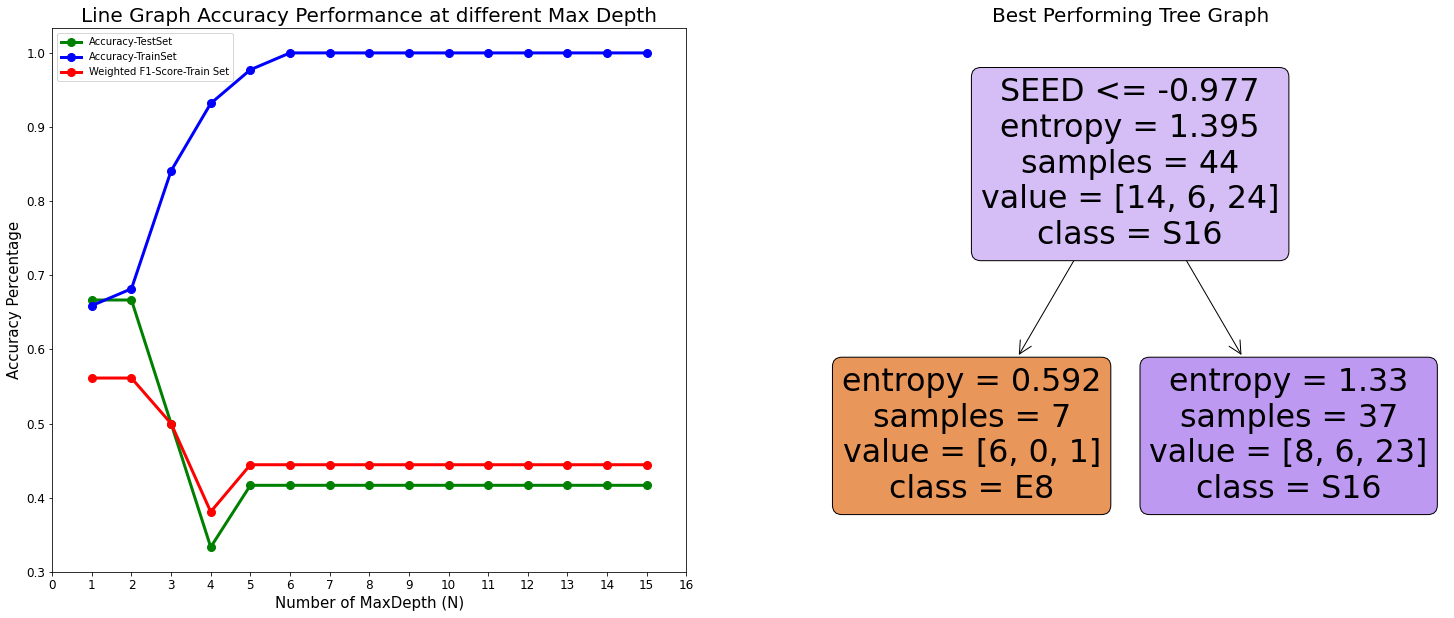

In [30]:
fig = plt.figure(figsize=(25,10)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Line plot

# Plot the graph
ax0.set_title('Line Graph Accuracy Performance at different Max Depth', fontsize=20)
ax0.plot(range(1,(Ks+1)), mean_acc_dt_test, 'g', linewidth=3, marker='o',markersize=8, label="Accuracy-TestSet") 
ax0.plot(range(1,(Ks+1)), mean_acc_dt_train, 'b', linewidth=3, marker='o',markersize=8,label="Accuracy-TrainSet") 
ax0.plot(range(1,(Ks+1)), f1_score_dt, 'r', linewidth=3, marker='o',markersize=8,label="Weighted F1-Score-Train Set") 
ax0.set_xlabel('Number of MaxDepth (N)', fontsize=15)
x_ticks = np.arange(0, (Ks+2), 1) 
ax0.set_xlim(0,(Ks+1)) 
ax0.set_xticks(x_ticks)
ax0.set_xticklabels(x_ticks, fontsize=12)
ax0.set_ylabel('Accuracy Percentage', fontsize=15)
ax0.tick_params(axis='y', labelsize=12)
ax0.legend()

# Subplot 2: Tree Graph

from sklearn import tree
tree.plot_tree(c_best_model #assigned  variable to the best one from above code 
               ,feature_names=featureNames  
               ,class_names = ytrain_labels 
               ,filled=True
               ,rounded=True      
               ,ax=ax1 #add to the second subplot
              ) 
ax1.set_title('Best Performing Tree Graph', fontsize=20)

plt.show()


# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [31]:
from sklearn import svm

In [32]:
# for curiousity
from sklearn.metrics import jaccard_score 
kernel_values=['linear', 'poly', 'rbf', 'sigmoid']
df_svm = pd.DataFrame(columns=['kernel_name', 'accuracy','accuracy_f1','accuracy_jc'])

for input_parameter in kernel_values:  
    clf2 = svm.SVC(kernel=input_parameter)
    clf2.fit(X_train, y_train) 
    yhat_svm = clf2.predict(X_val)
    df_svm = df_svm.append({'kernel_name' : input_parameter,
                            'accuracy'    : accuracy_score(y_val, yhat_svm),
                            'accuracy_f1' : f1_score(y_val, yhat_svm, average='micro'),
                            'accuracy_jc' : jaccard_score(y_val, yhat_svm,average='micro')
                           }, ignore_index=True)
df_svm

,kernel_name,accuracy,accuracy_f1,accuracy_jc
0,linear,0.250000,0.250000,0.142857
1,poly,0.666667,0.666667,0.500000
2,rbf,0.583333,0.583333,0.411765
3,sigmoid,0.583333,0.583333,0.411765


In [33]:
c=df_svm['accuracy'].argmax()
print("Best svm kernel: " , df_svm.loc[c][0] ) #based on the accuarcy column

Best svm kernel:  poly


<b> Harry - For a later part of the lab </b>

In [34]:
from sklearn import svm
svmmodel=svm.SVC(kernel='poly')

svmmodel.fit(X_train,y_train) # Train the model
yhat_svmm = svmmodel.predict(X_val) #Use the model to predict lables for Test set

#Evaulation Metric on SVM Model
print("Train set Accuracy: %.5f" % accuracy_score(y_train, svmmodel.predict(X_train))) #training set
print("Test set Accuracy: %.5f" %  accuracy_score(y_val, yhat_svmm)) #test set

Train set Accuracy: 0.75000
Test set Accuracy: 0.66667


# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [35]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) #train the model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

yhat_lg = lrmodel.predict(X_val) #Predict
yhat_prob = lrmodel.predict_proba(X_val) #Obtain probabilities

#Evaluation metrics
print("LogLoss: %.2f" % log_loss(y_val, yhat_prob)) #based on probability
print("Jaccard_score : %.4f" % jaccard_score(y_val, yhat_lg, average='micro')) #based on the predicted label
print("Accuracy score : %.4f" % accuracy_score(y_val,yhat_lg))
print("F1-score : %.4f" % f1_score(y_val, yhat_lg,average='micro'))

#confusion matrix statistics
print("\nConfusion Matrix: \n", confusion_matrix(y_val, yhat_lg, labels=['E8','F4','S16'])) #top-down order in the matrx 
      
print(classification_report(y_val, yhat_lg), "\n")

#to help confirm
s = ""
for i in range(len(yhat_lg[0:5])):
    s += str(yhat_prob[i].argmax()+1) + " " #just confirm the index, or label with highest probablity
    
print(s)
print(yhat_lg[0:5])
print(yhat_prob[0:5])

LogLoss: 1.10
Jaccard_score : 0.4118
Accuracy score : 0.5833
F1-score : 0.5833

Confusion Matrix: 
 [[1 0 1]
 [0 2 0]
 [4 0 4]]
              precision    recall  f1-score   support

          E8       0.20      0.50      0.29         2
          F4       1.00      1.00      1.00         2
         S16       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.67      0.67      0.63        12
weighted avg       0.73      0.58      0.62        12
 

2 3 1 1 1 
['F4' 'S16' 'E8' 'E8' 'E8']
[[0.31220273 0.3562491  0.33154818]
 [0.32510152 0.32839869 0.34649979]
 [0.36167465 0.30610437 0.33222097]
 [0.38701793 0.35317957 0.2598025 ]
 [0.35426016 0.32763412 0.31810573]]


# Model Evaluation using Test set


In [37]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [38]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**


### Load Test set for evaluation


In [39]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [40]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [41]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

<h3> Harry - I am going to use the below dataframe to capture the info </h3> 

In [42]:
df_multi_model = pd.DataFrame(columns=['Algorithm', 'Accuracy','Jaccard','F1-score','LogLoss'])    

KNN


In [43]:
y_pred_knn=knnmodel.predict(test_X) # Predict on Test model - KNN
ac = accuracy_score(test_y,y_pred_knn)
f1 = f1_score(test_y,y_pred_knn, average='micro')
js = jaccard_score(test_y, y_pred_knn, average='micro')
lgs='NA'

print(" Accuracy-KNN: %.6f" % ac)
print("  Jaccard-KNN: %.6f" % js)
print("       F1-KNN: %.6f" % f1)
print(" Log Loss-KNN: ", lgs)

df_multi_model = df_multi_model.append({'Algorithm' : 'KNN',
                                        'Accuracy'  : ac,
                                        'Jaccard'   : js,
                                        'F1-score'  : f1,
                                        'LogLoss'   : lgs
                                       }, ignore_index=True)

 Accuracy-KNN: 0.628571
  Jaccard-KNN: 0.458333
       F1-KNN: 0.628571
 Log Loss-KNN:  NA


Decision Tree


In [44]:
y_pred_dt=dtmodel.predict(test_X) # Predict on Test model - Decision Tree
ac = accuracy_score(test_y,y_pred_dt)
f1 = f1_score(test_y,y_pred_dt, average='micro')
js = jaccard_score(test_y, y_pred_dt, average='micro')
lgs='NA'

print(" Accuracy-Decision Tree: %.6f" % ac)
print("  Jaccard-Decision Tree: %.6f" % js)
print("       F1-Decision Tree: %.6f" % f1)
print(" Log Loss-Decision Tree: ", lgs)

df_multi_model = df_multi_model.append({'Algorithm' : 'Decision Tree',
                                        'Accuracy'  : ac,
                                        'Jaccard'   : js,
                                        'F1-score'  : f1,
                                        'LogLoss'   : lgs
                                       }, ignore_index=True)

 Accuracy-Decision Tree: 0.642857
  Jaccard-Decision Tree: 0.473684
       F1-Decision Tree: 0.642857
 Log Loss-Decision Tree:  NA


SVM


In [45]:
y_pred_svm=svmmodel.predict(test_X)# Predict on Test model - svm
ac = accuracy_score(test_y,y_pred_svm)
f1 = f1_score(test_y,y_pred_svm, average='micro')
js = jaccard_score(test_y, y_pred_svm, average='micro')
lgs='NA'

print(" Accuracy-KNN: %.6f" % ac)
print("  Jaccard-KNN: %.6f" % js)
print("       F1-KNN: %.6f" % f1)
print(" Log Loss-KNN: ", lgs)

df_multi_model = df_multi_model.append({'Algorithm' : 'SVM',
                                        'Accuracy'  : ac,
                                        'Jaccard'   : js,
                                        'F1-score'  : f1,
                                        'LogLoss'   : lgs
                                       }, ignore_index=True)

 Accuracy-KNN: 0.685714
  Jaccard-KNN: 0.521739
       F1-KNN: 0.685714
 Log Loss-KNN:  NA


Logistic Regression


In [46]:
y_pred_lr=lrmodel.predict_proba(test_X)      
y_pred_lgs=lrmodel.predict(test_X)# Predict on Test model - Logistic
ac = accuracy_score(test_y,y_pred_lgs)
f1 = f1_score(test_y,y_pred_lgs, average='micro')
js = jaccard_score(test_y, y_pred_lgs, average='micro')
x = log_loss(test_y, y_pred_lr)
s = format(x, '.5f')
lgs=s

print(" Accuracy-KNN: %.6f" % ac)
print("  Jaccard-KNN: %.6f" % js)
print("       F1-KNN: %.6f" % f1)
print(" Log Loss-KNN: ", lgs)

df_multi_model = df_multi_model.append({'Algorithm' : 'LogisticRegression',
                                        'Accuracy'  : ac,
                                        'Jaccard'   : js,
                                        'F1-score'  : f1,
                                        'LogLoss'   : lgs
                                       }, ignore_index=True)

 Accuracy-KNN: 0.685714
  Jaccard-KNN: 0.521739
       F1-KNN: 0.685714
 Log Loss-KNN:  1.03719


In [47]:
df_multi_model = df_multi_model.drop_duplicates()

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score | LogLoss |
| ------------------ | -------- | -------- | -------- | ------- |
| KNN                | 0.628571 | 0.458333 | 0.628571 | NA      |
| Decision Tree      | 0.642857 | 0.473684 | 0.642857 | NA      |
| SVM                | 0.685714 | 0.521739 | 0.685714 | NA      |
| LogisticRegression | 0.685714 | 0.521739 | 0.685714 | 1.03719 |


In [48]:
df_multi_model #display dataframe to compare the above - it looks it is matching

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.628571,0.458333,0.628571,NA
1,Decision Tree,0.642857,0.473684,0.642857,NA
2,SVM,0.685714,0.521739,0.685714,NA
3,LogisticRegression,0.685714,0.521739,0.685714,1.03719


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |
|                   |         |            |                                    |
|                   |         |            |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
